In [1]:
import pandas as pd
df = pd.read_csv("healthcare.csv")

In [2]:
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


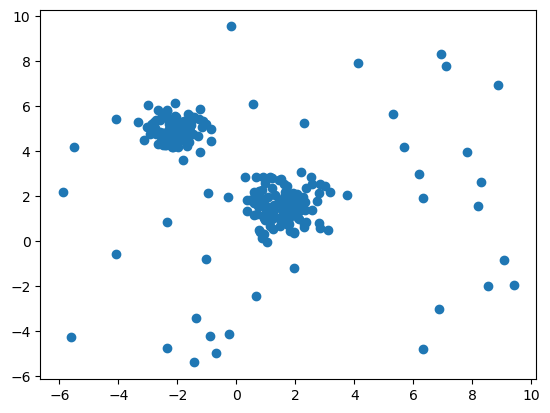

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [4]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination = 'auto')
clf.fit(df)
predictions = clf.predict(df)

In [5]:
predictions #-1 means outliers, 1 means normal data point

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [6]:
import numpy as np
index = np.where(predictions < 0)

In [7]:
index #these are outliers

(array([ 20,  24,  45,  48,  53,  55,  63,  72,  74,  78,  83,  85,  87,
         92,  97, 108, 114, 119, 130, 133, 141, 151, 160, 167, 179, 187,
        199, 204, 212, 217, 220, 221, 227, 242, 247, 248], dtype=int64),)

In [8]:
x = df.values

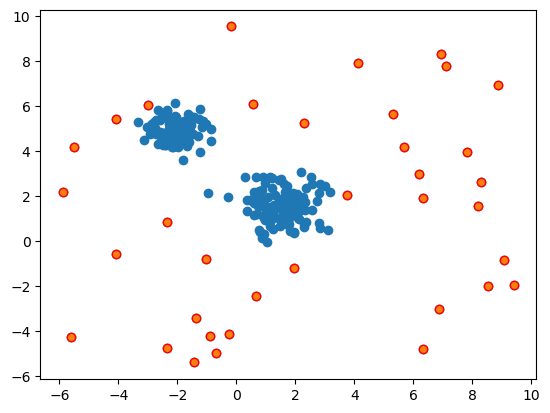

In [9]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors="r")

# DBSCAN CLUSTERING

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [11]:
X,y = make_circles(n_samples = 750,factor=0.3,noise=0.1)

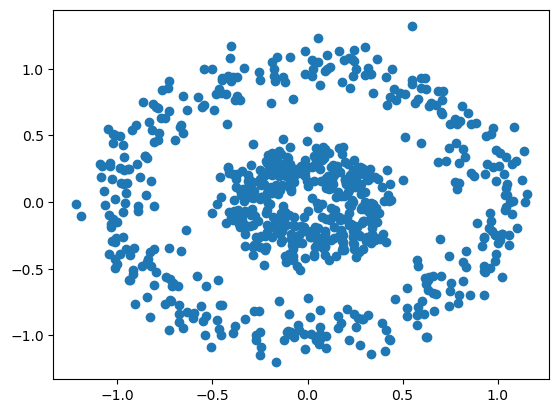

In [12]:
plt.scatter(X[:,0],X[:,1])

In [13]:
X

array([[ 0.32054594,  0.16266273],
       [-0.0697348 , -1.01066251],
       [ 1.0144238 , -0.28272689],
       ...,
       [ 0.4180687 ,  0.23754574],
       [-0.3081653 ,  0.17603698],
       [ 0.81662506, -0.59252669]])

In [14]:
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [15]:
from sklearn.cluster import DBSCAN

In [22]:
dbscan = DBSCAN(eps=0.10)
dbscan.fit_predict(X)

array([ 0,  1,  2,  3,  4,  0,  7,  0,  5, -1,  0,  5,  0,  0,  6,  0,  0,
        2,  0,  5,  0,  0,  5, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        5,  0,  3,  0, -1,  6, 11,  0,  0,  0,  5,  0, -1,  0,  0,  2,  5,
        5,  1,  0, -1,  0,  0,  0, 12, 12,  7,  0,  0,  0,  0,  5,  4,  0,
        2,  4,  8,  5,  1,  4,  2,  8,  5,  0,  0, 11,  0,  0,  1,  3,  4,
        5,  0,  5,  4,  0,  1,  0,  0,  8,  2,  0,  0,  0,  8,  0,  0,  0,
        0, -1,  0,  7,  0,  7,  4,  3,  5,  6, -1,  8,  5,  0,  8,  0,  0,
        4,  6,  5,  0,  0,  0,  1,  0,  2,  0,  0,  0,  7,  0,  0,  0, -1,
        0,  0,  3,  1,  0,  5,  0,  5,  2,  7,  7,  0,  0,  5,  8,  3,  9,
        5,  0,  0,  9,  4, -1,  0,  0,  0,  5,  0,  0,  9,  5,  4,  3,  0,
        1,  0,  0,  0,  0,  8,  0,  7,  0,  4,  3,  0,  0,  0,  0,  0,  0,
        0, -1,  5,  4,  0,  0,  8,  0, -1,  0,  4,  0,  0,  0, -1,  5,  0,
        5,  5,  5,  4,  0,  0,  4,  0,  0,  0,  6,  0,  4,  2,  4,  0,  0,
        0,  0,  0,  1,  0

In [23]:
dbscan.labels_

array([ 0,  1,  2,  3,  4,  0,  7,  0,  5, -1,  0,  5,  0,  0,  6,  0,  0,
        2,  0,  5,  0,  0,  5, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        5,  0,  3,  0, -1,  6, 11,  0,  0,  0,  5,  0, -1,  0,  0,  2,  5,
        5,  1,  0, -1,  0,  0,  0, 12, 12,  7,  0,  0,  0,  0,  5,  4,  0,
        2,  4,  8,  5,  1,  4,  2,  8,  5,  0,  0, 11,  0,  0,  1,  3,  4,
        5,  0,  5,  4,  0,  1,  0,  0,  8,  2,  0,  0,  0,  8,  0,  0,  0,
        0, -1,  0,  7,  0,  7,  4,  3,  5,  6, -1,  8,  5,  0,  8,  0,  0,
        4,  6,  5,  0,  0,  0,  1,  0,  2,  0,  0,  0,  7,  0,  0,  0, -1,
        0,  0,  3,  1,  0,  5,  0,  5,  2,  7,  7,  0,  0,  5,  8,  3,  9,
        5,  0,  0,  9,  4, -1,  0,  0,  0,  5,  0,  0,  9,  5,  4,  3,  0,
        1,  0,  0,  0,  0,  8,  0,  7,  0,  4,  3,  0,  0,  0,  0,  0,  0,
        0, -1,  5,  4,  0,  0,  8,  0, -1,  0,  4,  0,  0,  0, -1,  5,  0,
        5,  5,  5,  4,  0,  0,  4,  0,  0,  0,  6,  0,  4,  2,  4,  0,  0,
        0,  0,  0,  1,  0

In [24]:
# -1 are clusters

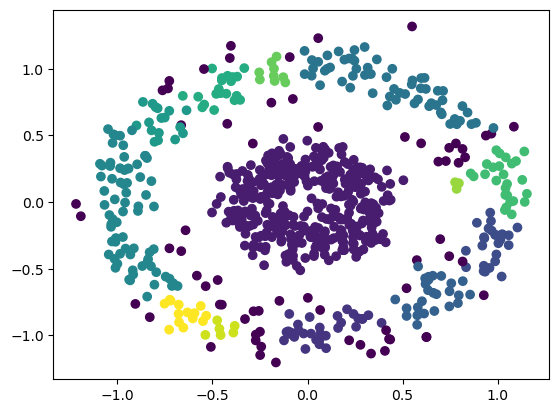

In [25]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

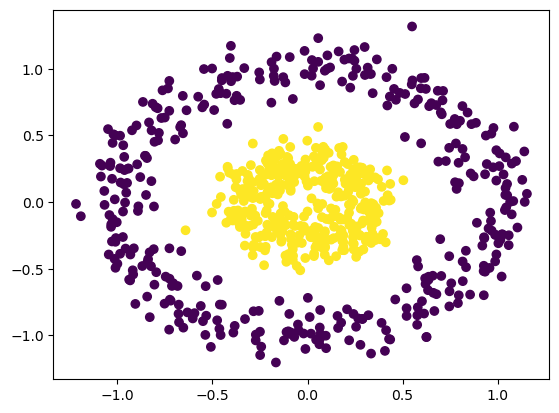

In [27]:
plt.scatter(X[:,0],X[:,1],c=y)

# Local outlier factors anamoly detection

In [28]:
from sklearn.neighbors import LocalOutlierFactor

In [29]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

In [30]:
outliers = X[y_pred == -1]
inliers = X[y_pred == 1]

print(f"Detected outliers:\n{outliers}")
print(f"Detected inliers:\n{inliers}")

Detected outliers:
[[-4.11441406e-01  2.20680094e-01]
 [ 3.70632291e-01  1.71061615e-01]
 [-2.07356077e-01  3.49756942e-01]
 [-2.87851225e-01  4.39212263e-01]
 [ 8.29490853e-02  4.14706565e-01]
 [-1.21790972e+00 -1.35749392e-02]
 [-7.60963530e-02 -4.02694559e-01]
 [ 9.25686553e-02  3.95260073e-01]
 [-2.28598949e-01 -4.73080436e-01]
 [-1.04953027e+00  5.47433671e-01]
 [ 5.04116990e-01  1.64011177e-01]
 [-7.75623779e-02 -4.34275388e-01]
 [ 4.29764670e-01  1.18503294e-02]
 [-3.92686795e-01  2.08522436e-01]
 [-9.09842597e-02  4.13460298e-01]
 [ 4.21529198e-01  5.17101073e-02]
 [ 5.97554005e-01  4.40792776e-01]
 [-2.83134931e-01 -3.19704747e-01]
 [ 6.97920857e-01 -2.77604960e-01]
 [ 5.17522752e-02 -1.01539355e-02]
 [-1.39981384e-03  4.60539055e-01]
 [-5.67061824e-02 -4.78528733e-01]
 [-7.72163391e-02  7.73441322e-01]
 [ 5.74800374e-01 -4.34767584e-01]
 [-4.78142468e-01 -1.32789941e-02]
 [ 4.40394149e-02  4.07009973e-01]
 [-1.87652607e-05 -7.01256295e-02]
 [-2.49346579e-01 -1.14685725e+00]
 

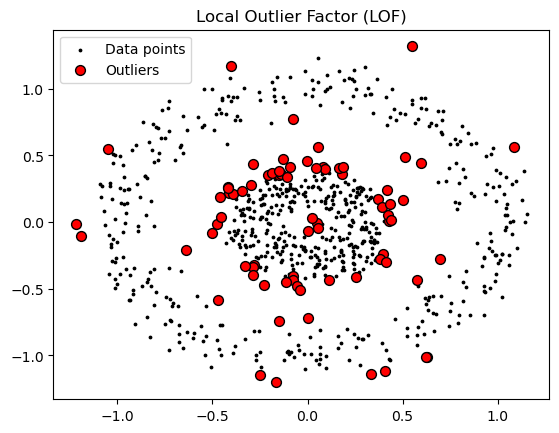

In [31]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], color='k', s=3, label='Data points')
plt.scatter(outliers[:, 0], outliers[:, 1], color='r', s=50, edgecolor='k', label='Outliers')
plt.title("Local Outlier Factor (LOF)")
plt.legend()
plt.show()